In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons , make_regression, make_circles
import time
from IPython.display import clear_output

In [4]:
# Parametros

p = 2   # Parametros
n = 500 # Numero de datos
# topologia = [p,4,8,1]  # circulos
topologia = [p,32,16,8,4,2,1]
lr = 0.05

(500,)
(500, 1)


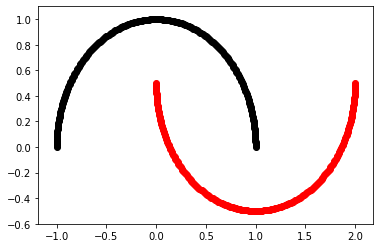

In [7]:
X,Y= make_moons(n) # noise=0,random_state=True)
X = np.array(X)
Y = np.array(Y)

print(Y.shape)
Y = Y[:,np.newaxis]
print(Y.shape)

T = np.hstack((X,Y))

for i,v in enumerate(T):
    plt.scatter(v[0],v[1],c=('r' if v[2] == 1 else 'k'))
plt.show()

(500,)
(500, 1)


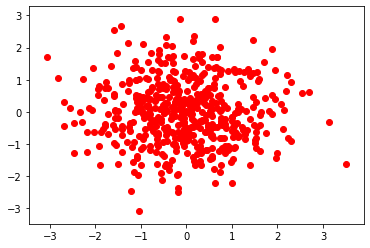

In [6]:
X,Y= make_regression(n,noise=.2)
X = np.array(X)
Y = np.array(Y)

print(Y.shape)
Y = Y[:,np.newaxis]
print(Y.shape)

T = np.hstack((X,Y))

for i,v in enumerate(T):
    plt.scatter(v[0],v[1],c='r')
plt.show()

(500,)
(500, 1)


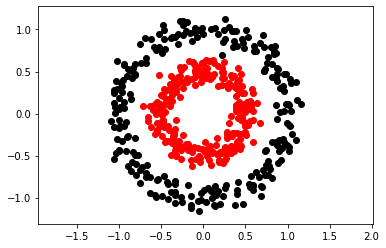

In [32]:
X,Y= make_circles(n,factor = .5,noise=.08)
X = np.array(X)
Y = np.array(Y)

print(Y.shape)
Y = Y[:,np.newaxis]    # Añadie eje para convertirlo en matriz columna
print(Y.shape)

T = np.hstack((X,Y))

for i,v in enumerate(T):
    plt.scatter(v[0],v[1],c=('r' if v[2] == 1 else 'k'))
plt.axis("equal")
plt.show()

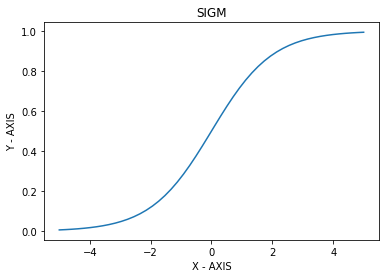

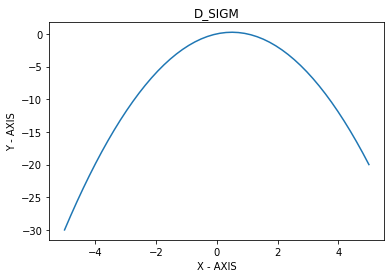

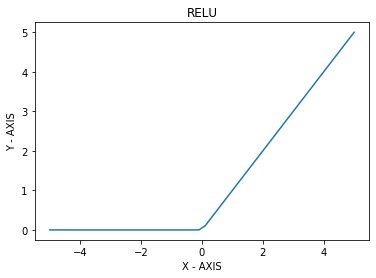

In [8]:
# FUNCIONES DE ACTIVACION Y COSTO

# ACT
sigm = lambda x: 1/(1 + np.e**(-x))
d_sigm = lambda x: x * (1-x)
relu = lambda x: np.maximum(0,x)

#COST
costo = lambda prediccion, real: np.mean((prediccion - real)**2)
d_costo = lambda prediccion, real: prediccion - real

_X = np.linspace(-5,5,50)
plt.plot(_X,sigm(_X))
plt.title("SIGM")
plt.xlabel("X - AXIS") , plt.ylabel("Y - AXIS")
plt.show()

_X = np.linspace(-5,5,50)
plt.plot(_X,d_sigm(_X))
plt.title("D_SIGM")
plt.xlabel("X - AXIS") , plt.ylabel("Y - AXIS")
plt.show()

_X = np.linspace(-5,5,50)
plt.plot(_X,relu(_X))
plt.title("RELU")
plt.xlabel("X - AXIS") , plt.ylabel("Y - AXIS")
plt.show()

In [16]:
# Parametros

p = 2   # Parametros
n = 500 # Numero de datos
# topologia = [p,4,8,1]  # circulos
topologia = [p,32,16,8,4,2,1]
lr = 0.05

In [10]:
# CAPA PARA LA RED

class neural_layer():
    
    def __init__(self, n_conn, n_neu, act_f, d_act_f):
        
        self.act_f = act_f
        self.d_act_f = d_act_f
        self.B = np.random.rand(1,n_neu) * 2 - 1
        self.W = np.random.rand(n_conn, n_neu) * 2 - 1        

In [11]:
# Create NN

def create_nn(topologia,act_f):
    
    nn = []
    
    for l, layer in enumerate(topologia[:-1]):
        
        nn.append(neural_layer(topologia[l],topologia[l+1],sigm,d_sigm))
        
    return nn

In [12]:
# Trainig

def train(nn, X, Y, lr=0.001,Train=True):

    # nn - Neural Network
    # X - Entrada , Y - Salida esperada
    
    # Forward Pass
    
    out = [(None,X)]
    
    for l, layer in enumerate(nn):
        z = out[-1][1] @ layer.W + layer.B
        a = layer.act_f(z)
        
        out.append((z,a))
    
    # BackPropagation
    
    if Train:
        # print("training :C")
        
        deltas = []
        
        for i in reversed(range(len(nn))):
            
            z, a = out[i+1]
            
            if i == len(nn) - 1: # Ultima capa
                deltas.insert(0, d_costo(a, Y) * nn[i].d_act_f(a) )
            else:                # Cualquier otra capa
                #print(deltas[0].shape,_W.shape)
                deltas.insert(0, deltas[0] @ _W.T * nn[i].d_act_f(a) )
                
            _W = nn[i].W    
            
            # Gradient Descent
        
            nn[i].B = nn[i].B - lr * np.mean(deltas[0], axis = 0, keepdims = True)
            # print(out[l][1].T.shape, deltas[0].shape)
            nn[i].W = nn[i].W - lr * out[i][1].T @ deltas[0]
    
    return out[-1][1]

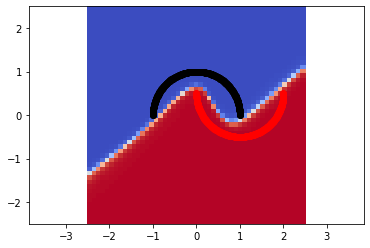

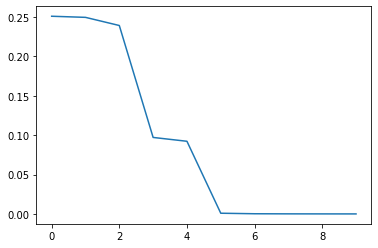

In [17]:
# Main

nn = create_nn(topologia,sigm)

loss = []

for i in range(1000):
    
    pY = train(nn,X,Y,lr)
    
    if i % 100 == 0:
        
        loss.append(costo(pY, Y))
        print(loss[-1])
        _n = 50
        
        _x0 = np.linspace(-2.5,2.5,_n)
        _x1 = np.linspace(-2.5,2.5,_n)
        
        _Y = np.zeros((_n,_n))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i1,i0] = train(nn,np.array([x0,x1]),Y,Train=False)[0][0]
                
        plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
        plt.axis("equal")
        
        T = np.hstack((X,Y))
        for i,v in enumerate(T):
            plt.scatter(v[0],v[1],c=('r' if v[2] == 1 else 'k'))
            
        clear_output(wait=True)
        plt.show()
        
        # Visualizacion funcion de coste
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(.1)
        